In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import files
files.upload()

Saving data_trial.csv to data_trial.csv


{'data_trial.csv': b'Gender,AGE,TEMP,SPO2,PULSE,IR\r\nFemale,26,100,92,109,1\r\nFemale,23,96,93,109,0\r\nMale,26,96,93,72,1\r\nFemale,24,103,93,121,0\r\nMale,48,100,85,80,1\r\nMale,24,103,86,45,1\r\nMale,45,100,94,80,1\r\nMale,48,100,92,109,1\r\nMale,26,101,85,70,1\r\nMale,26,97,94,113,1\r\nMale,26,102,93,68,1\r\nMale,30,98,86,109,1\r\nMale,36,100,92,45,1\r\nMale,36,96,85,121,1\r\nMale,26,100,93,69,1\r\nFemale,54,100,92,76,1\r\nFemale,41,97,87,71,1\r\nMale,48,96,93,70,1\r\nMale,26,96,93,109,0\r\nFemale,54,100,86,121,1\r\nMale,26,97,93,69,1\r\nFemale,26,102,93,69,1\r\nFemale,47,97,93,106,1\r\nFemale,49,96,92,50,0\r\nMale,57,96,85,121,1\r\nFemale,47,100,92,72,1\r\nMale,29,100,93,120,1\r\nFemale,30,103,93,80,1\r\nFemale,26,96,93,71,0\r\nMale,35,100,94,60,1\r\nMale,26,103,93,109,1\r\nFemale,46,100,86,70,0\r\nMale,47,103,94,69,1\r\nMale,29,96,95,121,1\r\nMale,66,100,91,109,1\r\nFemale,63,99,93,121,1\r\nMale,59,100,93,109,1\r\nFemale,26,100,93,70,1\r\nFemale,72,100,84,109,1\r\nMale,57,96,93,

In [68]:
data=pd.read_csv('data_trial.csv')

In [69]:
len(data)

2405

In [70]:
data.columns

Index(['Gender', 'AGE', 'TEMP', 'SPO2', 'PULSE', 'IR'], dtype='object')

In [71]:
data['IR'].value_counts()

1    2028
0     377
Name: IR, dtype: int64

In [72]:
data['TEMP'].value_counts()

100    820
96     449
97     380
103    177
101    157
102    156
99     150
98      70
104     25
105     21
Name: TEMP, dtype: int64

In [73]:
data['PULSE'].value_counts()

109    592
121    357
69     187
106    155
71     149
70     130
72     107
73      91
68      86
58      57
66      51
50      49
78      36
63      34
76      31
80      30
75      28
60      27
120     26
59      25
103     25
116     24
52      24
55      23
45      22
100     15
113     13
90      11
Name: PULSE, dtype: int64

In [74]:
data['SPO2'].value_counts()

93    777
92    421
85    351
86    237
84    233
94    154
87     92
91     45
95     38
88     37
83     13
96      6
89      1
Name: SPO2, dtype: int64

In [75]:
data.loc[(data.SPO2.between(90,100)) & (data.TEMP.between(96,99)) & (data.PULSE.between(60,100)),"Covid"]=0 

In [76]:
data['Covid'].fillna(1.0,inplace = True)

In [77]:
data

,Gender,AGE,TEMP,SPO2,PULSE,IR,Covid
0,Female,26,100,92,109,1,1.0
1,Female,23,96,93,109,0,1.0
2,Male,26,96,93,72,1,0.0
3,Female,24,103,93,121,0,1.0
4,Male,48,100,85,80,1,1.0
...,...,...,...,...,...,...,...
2400,Male,65,103,93,109,1,1.0
2401,Male,26,96,84,109,1,1.0
2402,Female,39,100,94,70,1,1.0
2403,Male,38,100,83,69,1,1.0


In [78]:
data['Covid'].value_counts()

1.0    2141
0.0     264
Name: Covid, dtype: int64

In [79]:
data_na = list(data.isnull().sum())
data.isnull().sum()

Gender    0
AGE       0
TEMP      0
SPO2      0
PULSE     0
IR        0
Covid     0
dtype: int64

In [80]:
for i in range(len(data_na)):
  print(len(data)-data_na[i])

2405
2405
2405
2405
2405
2405
2405


In [81]:
data_new = data.dropna()

In [82]:
data_new

,Gender,AGE,TEMP,SPO2,PULSE,IR,Covid
0,Female,26,100,92,109,1,1.0
1,Female,23,96,93,109,0,1.0
2,Male,26,96,93,72,1,0.0
3,Female,24,103,93,121,0,1.0
4,Male,48,100,85,80,1,1.0
...,...,...,...,...,...,...,...
2400,Male,65,103,93,109,1,1.0
2401,Male,26,96,84,109,1,1.0
2402,Female,39,100,94,70,1,1.0
2403,Male,38,100,83,69,1,1.0


In [83]:
#data has no null values so data aftwer cleaning remains same 
print("original data", len(data))
print("data after elimination", len(data_new))
print("Difference", len(data)-len(data_new))

original data 2405
data after elimination 2405
Difference 0


In [84]:
data.columns

Index(['Gender', 'AGE', 'TEMP', 'SPO2', 'PULSE', 'IR', 'Covid'], dtype='object')

In [85]:
X = data[['TEMP', 'PULSE', 'SPO2']]
y = data['Covid']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)

In [88]:
print("no of Covid-19 Parameters  data", len(X_train))
print("no of Actual Corona Patients detected", len(X_test))
print("no of Covid-19 Parameter training data", len(y_train))
print("no of Covid_Patient Detected By Model ", len(y_test))

no of Covid-19 Parameters  data 1322
no of Actual Corona Patients detected 1083
no of Covid-19 Parameter training data 1322
no of Covid_Patient Detected By Model  1083


In [89]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
y_pred = classifier.predict(X_test)

In [91]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [92]:
classifier.score(X_train, y_train) #Training Accuracy

0.981089258698941

In [93]:
classifier.score(X_test, y_test) #Testing Accuracy

0.976915974145891

In [94]:
classifier.score(X, y) #overall processed data

0.9792099792099792

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [96]:
cm

array([[ 92,  21],
       [  4, 966]])

In [97]:
print("no of Covid-19 Parameters  data", cm[0][0])
print("no of Actual Corona Patients detected", cm[0][1])
print("no of Covid-19 Parameter training data", cm[1][0])
print("no of Covid_Patient Detected By Model ", cm[1][1])

no of Covid-19 Parameters  data 92
no of Actual Corona Patients detected 21
no of Covid-19 Parameter training data 4
no of Covid_Patient Detected By Model  966


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       113
         1.0       0.98      1.00      0.99       970

    accuracy                           0.98      1083
   macro avg       0.97      0.91      0.93      1083
weighted avg       0.98      0.98      0.98      1083



In [99]:
y_fin=y_pred.tolist()

In [100]:
fin_co=data['Covid'].tolist()

In [101]:
nf = len(fin_co)
nf

2405

In [102]:
nyf=len(y_fin)
nyf

1083

In [103]:
nf_fin= fin_co[0:722]
nf_fin

[1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0

In [104]:
len(nf_fin) 

722

In [105]:
nf_fin.count(1)

641

In [106]:
y_fin.count(1)

987

In [107]:
x_temp=X_test['TEMP'].tolist()
x_oxy=X_test['SPO2'].tolist()
#x_hr=X_test['HR'].tolist()
x_pulse=X_test['PULSE'].tolist()
#x_resp=X_test['RESP'].tolist()

<BarContainer object of 2 artists>

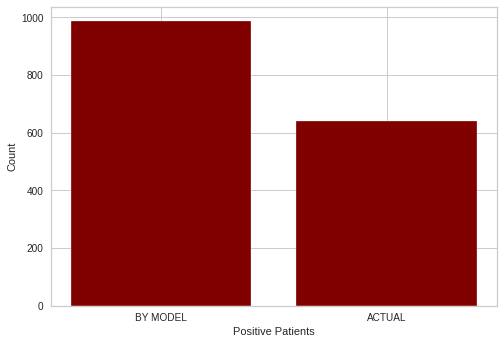

In [108]:
data_bar = {'BY MODEL':y_fin.count(1), 'ACTUAL':nf_fin.count(1)}
detect = list(data_bar.keys())
values = list(data_bar.values())
plt.xlabel("Positive Patients")
plt.ylabel("Count")
plt.bar(detect,values, color ='maroon', width = 0.8)

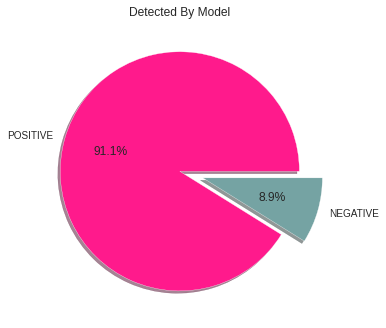

In [109]:
data_pie = {'POSITIVE':y_fin.count(1), 'NEGATIVE':y_fin.count(0)}
mylabels = list(data_pie.keys())
value=list(data_pie.values())
myexplode = [0, 0.2]
mycolors=["#ff1a8c","#75a3a3"]
plt.pie(value, labels = mylabels,explode = myexplode, shadow=True,autopct='%1.1f%%',colors=mycolors)
plt.title('Detected By Model')
plt.show() 

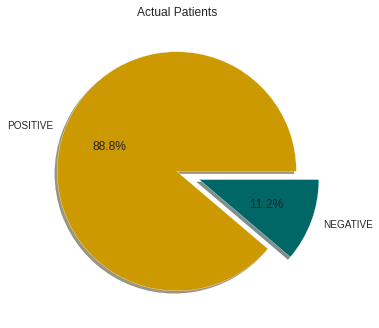

In [110]:
data_pie1 = {'POSITIVE':nf_fin.count(1), 'NEGATIVE':nf_fin.count(0)}
mylabels1 = list(data_pie1.keys())
value1=list(data_pie1.values())
myexplode = [0, 0.2]
mycolors=["#cc9900","#006666"]
plt.pie(value1, labels = mylabels1 ,explode = myexplode, shadow=True,autopct='%1.1f%%', colors=mycolors)
plt.title('Actual Patients')
plt.show()

In [111]:
positive_temp = []
positive_oxy=[]
positive_pulse=[]
negative_temp = []
negative_oxy=[]
negative_pulse=[]
for i in range(len(y_fin)):
  if y_fin[i] == 1:
    print("Index : ", i,"  Values : ", y_fin[i], "  Temp : ", x_temp[i], " Oxygen : ", x_oxy[i], " Pulse : ", x_pulse[i])
    positive_temp.append(x_temp[i])
    positive_oxy.append(x_oxy[i])
    #positive_hr.append(x_hr[i])
    positive_pulse.append(x_pulse[i])
    #positive_resp.append(x_resp[i])

  else :
    print("Index : ", i,"  Values : ", y_fin[i], "  Temp : ", x_temp[i], " Oxygen : ", x_oxy[i], " Pulse : ", x_pulse[i])
    negative_temp.append(x_temp[i])
    negative_oxy.append(x_oxy[i])
    #negative_hr.append(x_hr[i])
    negative_pulse.append(x_pulse[i])
    #negative_resp.append(x_resp[i])

Index :  0   Values :  1.0   Temp :  100  Oxygen :  93  Pulse :  70
Index :  1   Values :  1.0   Temp :  100  Oxygen :  93  Pulse :  109
Index :  2   Values :  1.0   Temp :  100  Oxygen :  93  Pulse :  121
Index :  3   Values :  0.0   Temp :  97  Oxygen :  93  Pulse :  68
Index :  4   Values :  1.0   Temp :  97  Oxygen :  84  Pulse :  121
Index :  5   Values :  1.0   Temp :  100  Oxygen :  84  Pulse :  71
Index :  6   Values :  1.0   Temp :  100  Oxygen :  95  Pulse :  109
Index :  7   Values :  1.0   Temp :  102  Oxygen :  92  Pulse :  75
Index :  8   Values :  1.0   Temp :  100  Oxygen :  85  Pulse :  68
Index :  9   Values :  1.0   Temp :  96  Oxygen :  84  Pulse :  106
Index :  10   Values :  1.0   Temp :  97  Oxygen :  92  Pulse :  106
Index :  11   Values :  1.0   Temp :  104  Oxygen :  88  Pulse :  71
Index :  12   Values :  1.0   Temp :  101  Oxygen :  93  Pulse :  121
Index :  13   Values :  0.0   Temp :  97  Oxygen :  92  Pulse :  69
Index :  14   Values :  1.0   Temp :  99  

Text(0, 0.5, 'Count')

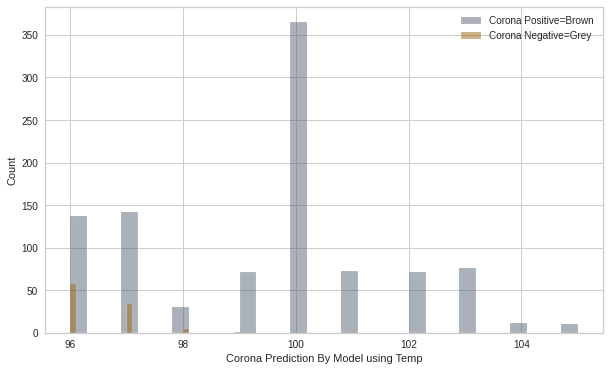

In [112]:
plt.figure(figsize=(10,6))
plt.hist(positive_temp, alpha=0.5,color='#566573', bins=30,label='Corona Positive=Brown')
plt.hist(negative_temp, alpha=0.5,color='#9c640c', bins=30,label='Corona Negative=Grey')
plt.legend()
plt.xlabel('Corona Prediction By Model using Temp')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

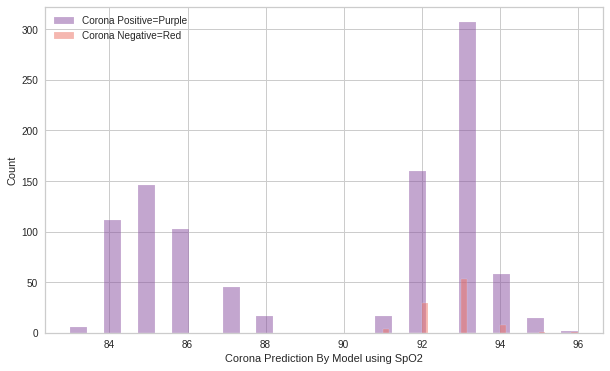

In [113]:
plt.figure(figsize=(10,6))
plt.hist(positive_oxy, alpha=0.5,color='#884ea0', bins=30,label='Corona Positive=Purple')
plt.hist(negative_oxy, alpha=0.5,color='#ec7063', bins=30,label='Corona Negative=Red')
plt.legend()
plt.xlabel('Corona Prediction By Model using SpO2')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

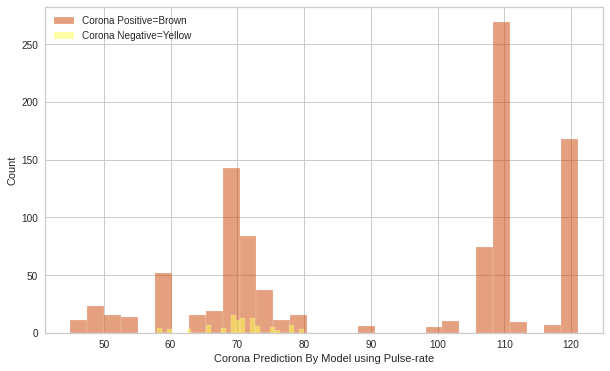

In [114]:
plt.figure(figsize=(10,6))
plt.hist(positive_pulse, alpha=0.5,color='#cc4400', bins=30,label='Corona Positive=Brown')
plt.hist(negative_pulse, alpha=0.5,color='#ffff4d', bins=30,label='Corona Negative=Yellow')
plt.legend()
plt.xlabel('Corona Prediction By Model using Pulse-rate')
plt.ylabel('Count')

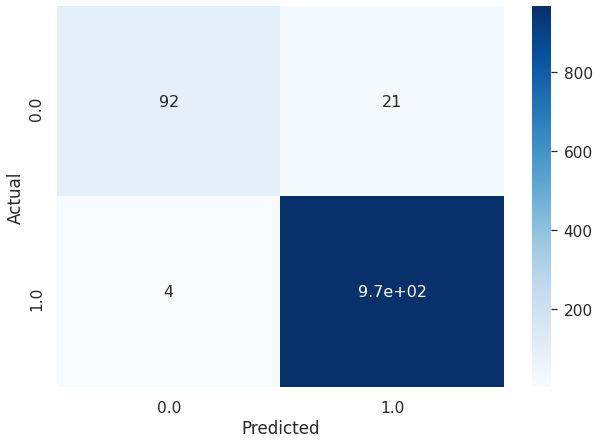

In [115]:
import seaborn as sn
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

0.976915974145891

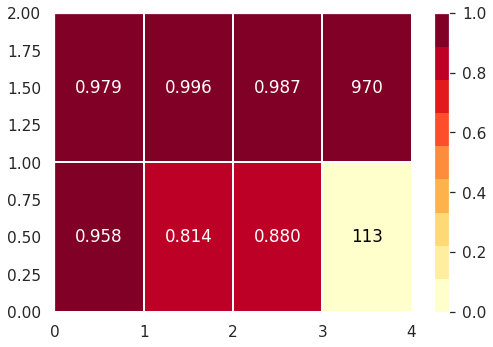

In [116]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.model_selection import TimeSeriesSplit

# Specify the target classes
classes = ["Corona-Positive ", "Corona-Negative"]

# Create the training and test data
tscv = TimeSeriesSplit()

visualizer = ClassificationReport(classifier, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

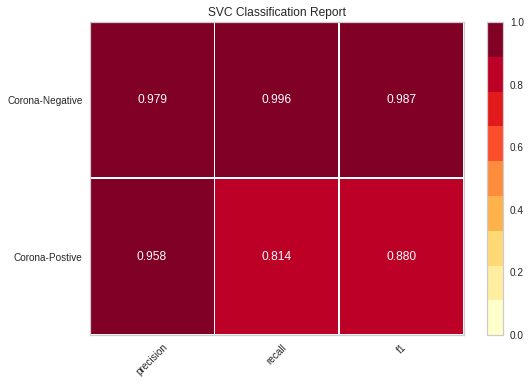

In [52]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix
classes = ['Corona-Postive', 'Corona-Negative']
visualizer = ClassificationReport(classifier, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

In [117]:
pip install wandb

In [118]:
pip install scikit-plot

In [144]:
labels="Covid-Negative","Covid-Positive"

In [145]:
import wandb


In [146]:
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels)


In [148]:
wandb.init(project="visualize-sklearn")